<a href="https://colab.research.google.com/github/IslamJenishbekov/house_kg_models/blob/main/data_preparing_models_building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Просмотр датасета

In [2]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7134 entries, 0 to 7133
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   main                            7134 non-null   object 
 1   address                         7134 non-null   object 
 2   added                           7134 non-null   object 
 3   upped                           6700 non-null   object 
 4   view_count                      7134 non-null   int64  
 5   hearts                          4522 non-null   float64
 6   lat                             7134 non-null   float64
 7   lon                             7134 non-null   float64
 8   Тип предложения                 7134 non-null   object 
 9   Серия                           7133 non-null   object 
 10  Дом                             7134 non-null   object 
 11  Этаж                            7130 non-null   object 
 12  Площадь                         71

(None, None)

In [3]:
train.head()

main                                            address  \
0  3-комн. кв., 113.8 м2   Бишкек, Московская - Уметалиева, Московская, 191   
1     2-комн. кв., 66 м2  Бишкек, с. Кок-Джар, с.Кок-Жар, ул.Конкур Осмо...   
2     3-комн. кв., 68 м2                Бишкек, 12 м-н, 12-й микрорайон, 69   
3    4-комн. кв., 135 м2  Бишкек, Магистраль, Байтик Баатыра (недалеко о...   
4     2-комн. кв., 67 м2           Бишкек, Джал 15 м-н, Ахунбаева/Тыналиева   

                      added                   upped  view_count  hearts  \
0  Добавлено 2 месяца назад  Поднято 12 часов назад         302     1.0   
1    Добавлено 7 дней назад   Поднято 7 часов назад         102     NaN   
2    Добавлено 5 дней назад   Поднято 9 часов назад         104     NaN   
3  Добавлено 4 месяца назад   Поднято 7 часов назад         797     3.0   
4  Добавлено 3 месяца назад   Поднято 20 дней назад         512     1.0   

       lat      lon Тип предложения                Серия                  Дом  \
0  42.8711  74.5823       от агента  индивид. планировка   кирпичный, 2017 г.   
1  42.8131  74.6482       от агента               элитка  монолитный, 2023 г.   
2  42.8129  74.6390       от агента            106 серия   кирпичный, 1990 г.   
3  42.8171  74.6059       от агента               элитка  монолитный, 2022 г.   
4  42.8467  74.5656       от агента               элитка  монолитный, 2023 г.   

            Этаж                   Площадь Отопление   Состояние  \
0  10 этаж из 12  113.8 м2, жилая: 62.9 м2       NaN         NaN   
1  10 этаж из 12                     66 м2   на газе  евроремонт   
2    7 этаж из 9       68 м2, жилая: 40 м2       NaN         NaN   
3   6 этаж из 14                    135 м2   на газе  евроремонт   
4   6 этаж из 14                     67 м2   на газе  евроремонт   

             Газ        Санузел               Балкон  Входная дверь Парковка  \
0            NaN            NaN                  NaN            NaN      NaN   
1  магистральный    совмещенный                  нет  бронированная  паркинг   
2            NaN            NaN                  NaN            NaN      NaN   
3     автономный     раздельный  застекленный балкон  бронированная  паркинг   
4     автономный  2 с/у и более  застекленный балкон  металлическая  паркинг   

  Высота потолков                                       Безопасность  \
0            3 м.                                                NaN   
1            3 м.  охрана,                                       ...   
2          2.8 м.                                                NaN   
3            3 м.  решетки на окнах,                             ...   
4            3 м.                                            домофон   

                      Правоустанавливающие документы               Телефон  \
0                                                NaN                   NaN   
1                                                NaN                   NaN   
2                                                NaN                   NaN   
3  договор долевого участия,                     ...  возможно подключение   
4                                технический паспорт  возможно подключение   

    Интернет                 Мебель Возможность рассрочки Возможность обмена  \
0        NaN                    NaN                   NaN                NaN   
1        NaN   частично меблирована                   NaN                NaN   
2        NaN                    NaN                   NaN                NaN   
3     оптика  полностью меблирована                   NaN                NaN   
4  проводной  полностью меблирована                   NaN                NaN   

                                              Разное      Пол  \
0                                                NaN      NaN   
1  пластиковые окна,                             ...  ламинат   
2                                                NaN      NaN   
3  пластиковые окна,                             ...  ламинат   
4  улучше

# Feature Engineering

## main (rooms_num, area)

In [4]:
def get_rooms_num(x):
  if x[0] == 'с':
    return None
  return x[0]


train['rooms_num'] = train.main.map(lambda main_element: get_rooms_num(main_element))
train.rooms_num.unique()

array(['3', '2', '4', '1', '6', '5', None], dtype=object)

In [5]:
train['square'] = train.main.map(lambda main_element: main_element.split(',')[1].replace('м2', '')).astype(float)

In [6]:
rooms_num_square_map = train.groupby('rooms_num').agg({'square': 'median'}).to_dict()['square']
rooms_num_square_map

{'1': 43.0, '2': 66.0, '3': 93.0, '4': 140.0, '5': 205.85, '6': 320.0}

In [7]:
def fill_rooms_num_smartly(row):
  rooms_num, square = row['rooms_num'], row['square']
  if rooms_num:
    return rooms_num
  pred_rooms_num = '1'
  square_diff, min_square_diff = 1000, 1000
  for key, value in rooms_num_square_map.items():
    square_diff = abs(square - value)
    if square_diff < min_square_diff:
      min_square_diff = square_diff
      pred_rooms_num = key
  return pred_rooms_num


train['rooms_num'] = train.apply(fill_rooms_num_smartly, axis=1).astype(int)

In [8]:
train['rooms_num'].value_counts()

rooms_num
2    2551
3    2042
1    1909
4     504
5      93
6      35
Name: count, dtype: int64

<Axes: xlabel='square', ylabel='Density'>

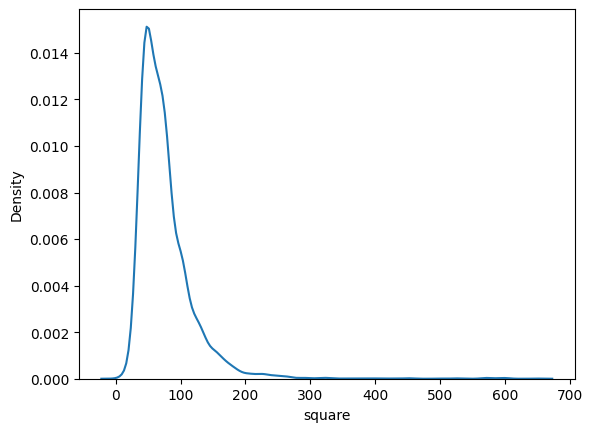

In [9]:
sns.kdeplot(train.square)

In [10]:
train.loc[(train.square < 20)|(train.square > 300)][['square', 'usd_price']]

square  usd_price
531   326.00     522000
563    19.00      21500
633    16.00      23000
720   650.00     750000
1102  380.00     575000
1369  600.00     710000
1413  580.00     680000
1535    1.00     103000
1568  570.00     650000
1693  362.00     586000
1740  400.00     550000
1880  336.00     570000
1900   18.00      27700
1973  570.00     735000
2101  320.00     530000
2231  500.00     720000
2237  571.00     559580
2450  380.00     700000
2502  315.00     378500
2621  315.40     427367
2635  414.00     400000
2691  571.00     656650
2789   12.00      29000
2922   16.00      22000
2990  326.00     522000
3300  600.00     730000
3350  600.00     720000
3438   18.00      32000
3460   18.00      25500
3538  601.00    1202000
3730  453.00     490000
3738   13.00      23000
3848   13.00      30000
3908   18.00      29500
4011   17.00      24500
4051   18.00      28000
4088  457.00     685500
4261   15.00      25000
4286  525.00     620000
4647   16.00      27500
4701  320.00     480000
4735  447.12     520000
4772   13.00      26500
4870  588.00     710000
5113   19.00      21500
5207  391.00     449650
5285   16.00      21500
5446   19.00      21000
5920   12.00      24000
6018   16.60      21500
6383   18.00      23500
6510   18.00      25500
6528   13.00      22500
6710  525.00     586000
6781  354.00     460000
7082  430.00     650000

In [11]:
train = train.loc[(train.square > 10)]

In [12]:
test['rooms_num'] = test.main.map(lambda main_element: get_rooms_num(main_element))
test.rooms_num.unique()

array(['1', '2', '3', '4', None, '6', '5'], dtype=object)

In [13]:
test['square'] = test.main.map(lambda main_element: main_element.split(',')[1].replace('м2', '')).astype(float)

In [14]:
test['rooms_num'] = test.apply(fill_rooms_num_smartly, axis=1).astype(int)

In [15]:
test.rooms_num.value_counts()

rooms_num
2    631
3    510
1    495
4    127
5     16
6      5
Name: count, dtype: int64

<Axes: xlabel='square', ylabel='Density'>

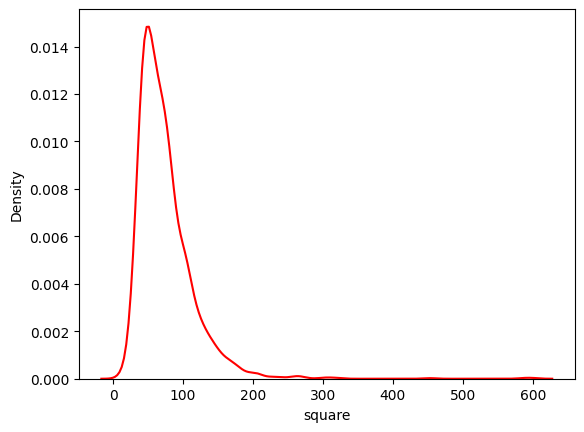

In [16]:
sns.kdeplot(test.square, color='red')
# sns.kdeplot(train.square)

In [17]:
test.loc[(test.square < 20)|(test.square > 300)]

id                              main  \
142    143      6 и более комнат кв., 588 м2   
565    566                1-комн. кв., 18 м2   
640    641                1-комн. кв., 18 м2   
915    916                1-комн. кв., 17 м2   
941    942               5-комн. кв., 308 м2   
1059  1060               5-комн. кв., 301 м2   
1077  1078                1-комн. кв., 11 м2   
1176  1177               5-комн. кв., 453 м2   
1205  1206              1-комн. кв., 18.2 м2   
1426  1427  свободная планировка кв., 320 м2   
1620  1621               5-комн. кв., 600 м2   

                                                address  \
142             Бишкек, Золотой квадрат, пр. Эркиндик 9   
565                                  Бишкек, Пишпек ж/м   
640                               Бишкек, БГУ, Айни, 31   
915                      Бишкек, Лебединовка, кольбаева   
941                                  Бишкек, Душанбинка   
1059  Бишкек, Сквер Тоголок Молдо, Московская 137/То...   
1077                              Бишкек, Мед. академия   
1176                     Бишкек, Магистраль, Куттубаева   
1205                    Бишкек, Чуй - Алматинка, чуй 15   
1426            Бишкек, с. Кок-Джар, Ачекей/Сухе-Батора   
1620      Бишкек, Золотой квадрат, Орозбекова/Токтогула   

                           added                   upped  view_count  hearts  \
142     Добавлено 3 месяца назад  Поднято 15 часов назад         576     1.0   
565    Добавлено 5 месяцев назад   Поднято 20 дней назад        1289     3.0   
640     Добавлено 2 месяца назад  Поднято 12 часов назад         886     3.0   
915     Добавлено 4 месяца назад   Поднято 20 дней назад         785     3.0   
941        Добавлено 1 год назад  Поднято 13 часов назад        3229    14.0   
1059   Добавлено 5 месяцев назад   Поднято 7 часов назад        1342     7.0   
1077      Добавлено 24 дня назад   Поднято 9 часов назад         268     1.0   
1176  Добавлено 10 месяцев назад  Поднято 14 часов назад        2192     8.0   
1205       Добавлено 2 дня назад   Поднято 8 часов назад          55     NaN   
1426   Добавлено 5 месяцев назад  Поднято 16 часов назад         708     2.0   
1620  Добавлено 10 месяцев назад  Поднято 12 часов назад        6165    20.0   

          lat      lon Тип предложения                Серия  \
142   42.8672  74.6070       от агента             пентхаус   
565   42.8566  74.5516       от агента  индивид. планировка   
640   42.8487  74.5835       от агента          малосемейка   
915   42.8777  74.6701       от агента          малосемейка   
941   42.8493  74.5958       от агента  индивид. планировка   
1059  42.8706  74.5948       от агента               элитка   
1077  42.8425  74.6084       от агента          малосемейка   
1176  42.8131  74.6203       от агента               элитка   
1205  42.8820  74.6370       от агента  индивид. планировка   
1426  42.8321  74.6535       от агента               элитка   
1620  42.8713  74.6020       от агента               элитка   

                      Дом           Этаж              Площадь      Отопление  \
142            монолитный  10 этаж из 11               588 м2    центральное   
565             кирпичный    4 этаж из 4                18 м2    центральное   
640    кирпичный, 1960 г.    5 этаж из 5  18 м2, жилая: 13 м2            NaN   
915             кирпичный    3 этаж из 4                17 м2  электрическое   
941             кирпичный    1 этаж из 3               308 м2  электрическое   
1059            кирпичный    6 этаж из 7               301 м2    центральное   
1077            кирпичный    1 этаж из 4                11 м2    центральное   
1176  монолитный, 2023 г.   9 этаж из 11               453 м2        на газе   
1205            кирпичный    4 этаж из 5              18.2 м2    центральное   
1426   кирпичный, 2018 г.    8 этаж из 8               320 м2        на газе   
1620   кирпичный, 2018 г.  10 этаж из 10               600 м2    центральное   

                  Состояние            Газ 

## usd price

<Axes: xlabel='price_per_sq', ylabel='Density'>

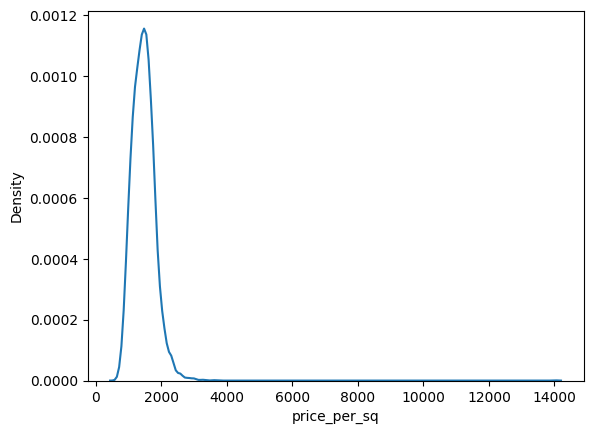

In [18]:
train['price_per_sq'] = train.usd_price / train.square
sns.kdeplot(train.price_per_sq)

<Axes: xlabel='price_per_sq', ylabel='Density'>

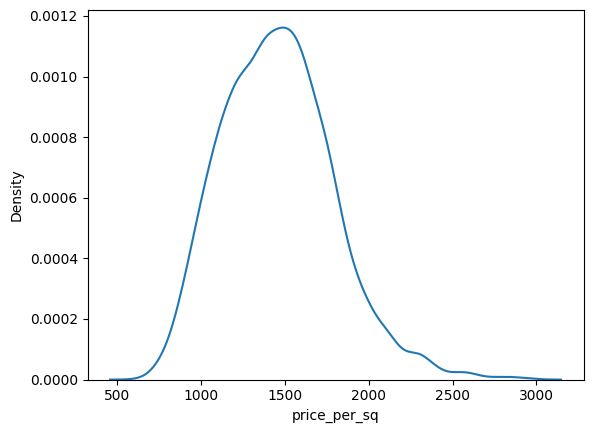

In [19]:
train = train.loc[train.price_per_sq < 3000]
sns.kdeplot(train.price_per_sq)

## address

In [20]:
def detect_city_village(x: str) -> int:
  if 'с.' in x:
    print(x)
    return 0
  return 1


train['is_city'] = train.address.map(detect_city_village)

Бишкек, с. Кок-Джар, с.Кок-Жар, ул.Конкур Осмона 6/1
Бишкек, с. Кок-Джар
Бишкек, с. Кок-Джар, мкр. Кок Жар
Бишкек, с. Пригородное, юбилейная
Бишкек, с. Кок-Джар, мкр. Кок Жар
Бишкек, Магистраль, с. Орто-Сай, контур 13
Бишкек, с. Кок-Джар, АЛМАТИНКА ГОРЬКИЙ
Бишкек, с. Кок-Джар,  ул.Арашан 10
Бишкек, с. Кок-Джар, с. Кок-Джар Бейшена Егимбаева, 145/1
Бишкек, с. Кок-Джар, Алма-Aтинская/Токомбаева
Бишкек, с. Кок-Джар, Арашан, 10а
Бишкек, Лебединовка, с. Лебединовка, ул. Мичурина 16
Бишкек, с. Маевка
Бишкек, с. Кок-Джар, с. Кок-Жар, ул.Конур Осмона
Бишкек, с. Кок-Джар, Баялинова 31
Бишкек, с. Кок-Джар, мкр. Кок Жар
Бишкек, с. Кок-Джар, мкр. Кок Жар
Бишкек, с. Аламудун
Бишкек, с. Кок-Джар, мкр. Кок Жар
Бишкек, с. Кок-Джар, мкр. Кок Жар
Бишкек, с. Кок-Джар,  ул.Арашан 10
Бишкек, с. Кок-Джар, Баялинова, 31
Бишкек, с. Кок-Джар, Алма-Aтинская/Токомбаева
Бишкек, с. Кок-Джар, мкр. Кок Жар
Бишкек, с. Кок-Джар,  ул.Арашан 10
Бишкек, с. Кок-Джар, Арашан, 10а
Бишкек, с. Кок-Джар 44
Бишкек, с. Кок-Джар,

In [21]:
train.is_city.value_counts()

is_city
1    6841
0     279
Name: count, dtype: int64

In [22]:
test['is_city'] = test.address.map(detect_city_village)
test.is_city.value_counts()

Бишкек, с. Кок-Джар, Конур Осмон, 6
Бишкек, с. Кок-Джар, с. Кок-Жар, ул.Конур Осмона
Бишкек, с. Кок-Джар, Алма-Атинская/Южная магистраль
Бишкек, с. Кок-Джар, Алма-Атинская/Южная магистраль
Бишкек, Лебединовка, с. Лебединовка, ул. Мичурина 11
Бишкек, с. Кок-Джар, с.Кок-Жар, ул.Конкур Осмона
Бишкек, с. Кок-Джар, с. кок-жар, ул. баялинова 31
Бишкек, с. Кок-Джар,  ул.Арашан 10
Бишкек, с. Кок-Джар, Арашан 1
Бишкек, с. Кок-Джар
Бишкек, с. Кок-Джар 9/Баялинова
Бишкек, с. Кок-Джар, Алма-Aтинская/Токомбаева
Бишкек, с. Кок-Джар,  ул.Арашан 10
Бишкек, с. Кок-Джар,  ул. Мудиева 1/1
Бишкек, с. Кок-Джар, Арашан, 10а
Бишкек, с. Орто-Сай,
Бишкек, с. Кок-Джар, Конур Осмон, 178а
Бишкек, с. Кок-Джар, с. Кок-Жар, ул.Конур Осмона
Бишкек, с. Кок-Джар
Бишкек, с. Кок-Джар, мкр. Кок Жар
Бишкек, с. Аламудун
Бишкек, с. Кок-Джар, Конур осмон 6/1
Бишкек, с. Кок-Джар, с. Кок-Джар Бейшена Егимбаева, 145/1 145/1
Бишкек, с. Восток, Ленина пр-т, 1
Бишкек, Лебединовка, с. Лебединовка, ул. Мичурина 11
Бишкек, с. Кок-Джар

is_city
1    1729
0      55
Name: count, dtype: int64

## Тип предложения

In [23]:
train['offer_type'] = train['Тип предложения']
test['offer_type'] = test['Тип предложения']

## latitude, longitude (zone)

In [24]:
!pip install h3 folium

In [25]:
train = train.loc[train.lon > 60]

In [26]:
import folium

def show_circles_on_map(data_train, data_test, latitude_column, longitude_column):

    location = (42.875635, 74.603782)
    m = folium.Map(location=location)

    for _, row in data_train.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color='red',
            fill_color=True,
            fill=True,
        ).add_to(m)

    for _, row in data_test.iterrows():
      folium.Circle(
          radius=100,
          location=(row[latitude_column], row[longitude_column]),
          color='blue',
          fill_color=True,
          fill=True,
      ).add_to(m)

    return m

show_circles_on_map(train, test, "lat", "lon")

In [27]:
import h3

train["zone"] = train.apply(lambda row: h3.latlng_to_cell(row["lat"], row["lon"], 7), axis=1)
test["zone"] = test.apply(lambda row: h3.latlng_to_cell(row["lat"], row["lon"], 7), axis=1)


# Создаем карту
location = (42.875635, 74.603782)
m = folium.Map(location=location, zoom_start=12)


for cell_index in test.zone.unique():
  # h3.cell_to_boundary возвращает кортежи (lat, lon), что идеально для folium
  boundary = h3.cell_to_boundary(cell_index)
  folium.Polygon(locations=boundary, color="red", weight=3, fill_opacity=0.2).add_to(m)


for cell_index in train.zone.unique():
  # h3.cell_to_boundary возвращает кортежи (lat, lon), что идеально для folium
  boundary = h3.cell_to_boundary(cell_index)
  folium.Polygon(locations=boundary, color="blue", weight=3, fill_opacity=0.2).add_to(m)


# Отображаем карту
m

## Этажи

In [28]:
def get_flat_floor(x):
  x = str(x)
  if x[0].isdigit():
    return x.split()[0]
  elif 'цоколь' in x or "подвал" in x:
    return '-1'
  return None

train['flat_floor'] = train['Этаж'].map(get_flat_floor).astype(float)
test['flat_floor'] = test['Этаж'].map(get_flat_floor).astype(float)

In [29]:
def get_general_num_floors(x):
  x = str(x)
  if x[-1].isdigit():
    return x.split()[-1]
  elif 'цоколь' in x or "подвал" in x:
    return x.split()[-2]
  return None


train['floors_num'] = train['Этаж'].map(get_general_num_floors).astype(float)
test['floors_num'] = test['Этаж'].map(get_general_num_floors).astype(float)

<Axes: xlabel='floors_num', ylabel='Density'>

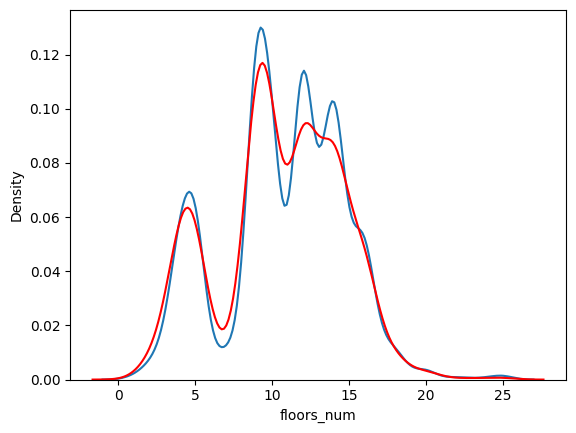

In [30]:
sns.kdeplot(train.floors_num)
sns.kdeplot(test.floors_num, color='red')

## дом (wall_material, build_age)

In [31]:
train['Дом']

0        кирпичный, 2017 г.
1       монолитный, 2023 г.
2        кирпичный, 1990 г.
3       монолитный, 2022 г.
4       монолитный, 2023 г.
               ...         
7129     панельный, 1979 г.
7130     кирпичный, 2022 г.
7131    монолитный, 2025 г.
7132    монолитный, 2019 г.
7133    монолитный, 2022 г.
Name: Дом, Length: 7119, dtype: object

In [32]:
train['wall_material'] = train['Дом'].map(lambda x: x.split(',')[0])
test['wall_material'] = test['Дом'].map(lambda x: x.split(',')[0])

In [33]:
train['build_age'] = train['Дом'].map(lambda x: None if "," not in x else x.split(',')[1].replace('г.', "")).astype(float)
train.loc[(train.build_age < 1900)|(train.build_age > 2025), 'build_age'] = None
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7119 entries, 0 to 7133
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   main                            7119 non-null   object 
 1   address                         7119 non-null   object 
 2   added                           7119 non-null   object 
 3   upped                           6688 non-null   object 
 4   view_count                      7119 non-null   int64  
 5   hearts                          4512 non-null   float64
 6   lat                             7119 non-null   float64
 7   lon                             7119 non-null   float64
 8   Тип предложения                 7119 non-null   object 
 9   Серия                           7118 non-null   object 
 10  Дом                             7119 non-null   object 
 11  Этаж                            7115 non-null   object 
 12  Площадь                         7119 no

In [34]:
test['build_age'] = test['Дом'].map(lambda x: None if "," not in x else x.split(',')[1].replace('г.', "")).astype(float)
test.loc[(test.build_age < 1900)|(test.build_age > 2025), 'build_age'] = None
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1784 entries, 0 to 1783
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1784 non-null   int64  
 1   main                            1784 non-null   object 
 2   address                         1784 non-null   object 
 3   added                           1784 non-null   object 
 4   upped                           1685 non-null   object 
 5   view_count                      1784 non-null   int64  
 6   hearts                          1145 non-null   float64
 7   lat                             1784 non-null   float64
 8   lon                             1784 non-null   float64
 9   Тип предложения                 1784 non-null   object 
 10  Серия                           1784 non-null   object 
 11  Дом                             1784 non-null   object 
 12  Этаж                            17

In [35]:
train.loc[pd.isna(train.build_age)][['price_per_sq', 'address', 'main', 'floors_num']]

price_per_sq                           address                    main  \
9       850.746269  Бишкек, АЮ Grand, Анкара/Ауэзова      2-комн. кв., 67 м2   
16     1961.538462               Бишкек, Бишкек-Парк      2-комн. кв., 52 м2   
21     1685.714286       Бишкек, Молодая Гвардия, 35      1-комн. кв., 35 м2   
23     1100.000000                Бишкек, Магистраль    2-комн. кв., 82.1 м2   
26     1471.153846          Бишкек, Средний Джал м-н      1-комн. кв., 52 м2   
...            ...                               ...                     ...   
7110   1363.636364    Бишкек, Парк Ататюрк, Шакирова      3-комн. кв., 55 м2   
7111   1046.193465                  Бишкек, Гагарина  4-комн. кв., 124.26 м2   
7119   1050.000000                    Бишкек, 12 м-н     3-комн. кв., 143 м2   
7120   1769.230769   Бишкек, Дордой Плаза, токтогула      2-комн. кв., 52 м2   
7123   1944.444444                    Бишкек, 12 м-н      1-комн. кв., 45 м2   

      floors_num  
9            9.0  
16           4.0  
21           9.0  
23          12.0  
26           9.0  
...          ...  
7110         4.0  
7111        16.0  
7119        12.0  
7120         5.0  
7123        11.0  

[2067 rows x 4 columns]

<Axes: xlabel='build_age', ylabel='Density'>

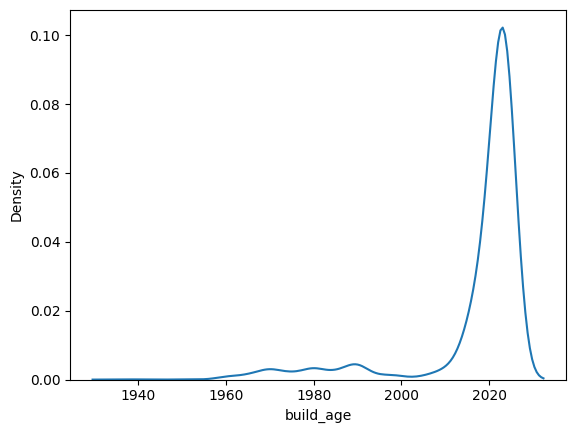

In [36]:
sns.kdeplot(train.build_age)

In [37]:
floors_num_map = train.groupby('build_age').agg({'floors_num': 'median', 'price_per_sq': 'median'}).to_dict()['floors_num']
price_per_sq_map = train.groupby('build_age').agg({'floors_num': 'median', 'price_per_sq': 'median'}).to_dict()['price_per_sq']
count_map = train.groupby('build_age').agg({'floors_num': 'count'}).to_dict()['floors_num']

In [38]:
result = {}

# floors_num * 100 + price_per_sq

def get_result_map():
  for i in range(1935, 2030, 5):
    start = i
    end = i + 5
    sum_floors, counter = 0, 0
    for key, value in floors_num_map.items():
      if key >= start and key < end:
        if str(value) == "nan":
          continue
        sum_floors += value * count_map[key]
        counter += count_map[key]
    if counter == 0:
      continue
    average_floors = sum_floors / counter
    result[start] = average_floors
  return result
floors_build_age_map = get_result_map()
floors_build_age_map

{1935: 3.0,
 1950: 3.0,
 1955: 4.0,
 1960: 3.3870967741935485,
 1965: 4.150943396226415,
 1970: 4.328767123287672,
 1975: 4.4603174603174605,
 1980: 6.458823529411765,
 1985: 7.691358024691358,
 1990: 8.881188118811881,
 1995: 7.1,
 2000: 8.416666666666666,
 2005: 8.291666666666666,
 2010: 9.392,
 2015: 11.01302460202605,
 2020: 12.462040535898316,
 2025: 13.0}

In [39]:
def fill_build_age_smartly(row):
  build_age, floors_num = row['build_age'], row['floors_num']
  if pd.notna(build_age):
    return build_age
  pred_build_age = 2000
  floors_diff, min_floors_diff = 1000, 1000
  for key, value in floors_build_age_map.items():
    floors_diff = abs(floors_num - value)
    if floors_diff < min_floors_diff:
      min_floors_diff = floors_diff
      pred_build_age = key
  return pred_build_age

train['build_age'] = train.apply(fill_build_age_smartly, axis=1)
test['build_age'] = test.apply(fill_build_age_smartly, axis=1)

In [40]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7119 entries, 0 to 7133
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   main                            7119 non-null   object 
 1   address                         7119 non-null   object 
 2   added                           7119 non-null   object 
 3   upped                           6688 non-null   object 
 4   view_count                      7119 non-null   int64  
 5   hearts                          4512 non-null   float64
 6   lat                             7119 non-null   float64
 7   lon                             7119 non-null   float64
 8   Тип предложения                 7119 non-null   object 
 9   Серия                           7118 non-null   object 
 10  Дом                             7119 non-null   object 
 11  Этаж                            7115 non-null   object 
 12  Площадь                         7119 no

(None, None)

<Axes: xlabel='build_age', ylabel='Density'>

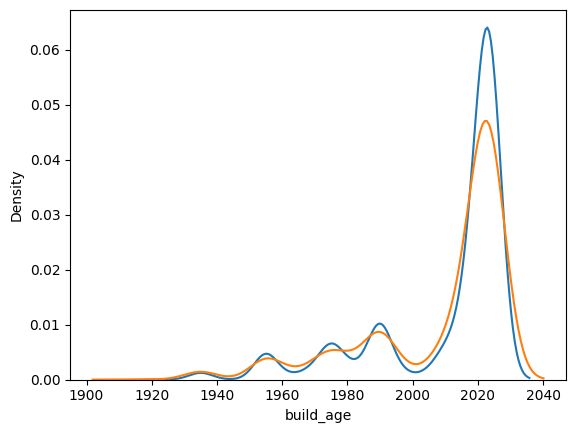

In [41]:
sns.kdeplot(train.build_age)
sns.kdeplot(test.build_age)

## Отопление

In [42]:
train.Отопление.value_counts()

Отопление
центральное           3094
на газе               1999
автономное             516
электрическое          209
смешанное               23
на твердом топливе       2
без отопления            1
Name: count, dtype: int64

<Axes: xlabel='price_per_sq', ylabel='Отопление'>

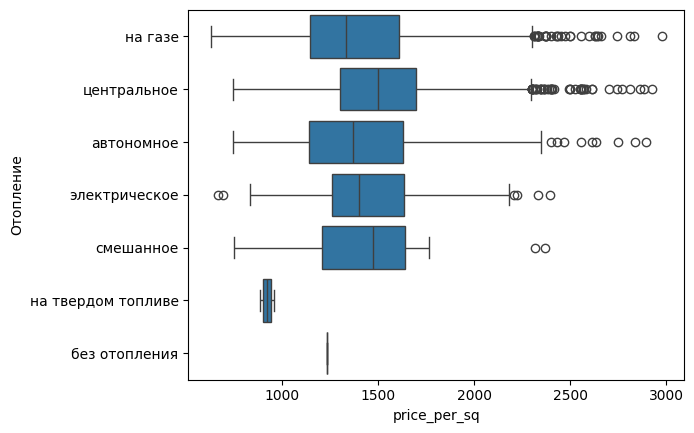

In [43]:
# обычно чтобы категориальная фича была хорошей, она должна иметь ~30 объектов, тут же видим что смешанное, на твердом топливе и без отопления не добирают
# но по цене они сильно отличаются, и трудно их привести к одной категории + тут много нанов, давайте смешанное, на твердом топливе, и без отопления + наны сделаем просто как не указано
sns.boxplot(data=train, x='price_per_sq', y='Отопление')

In [44]:
train['heating'] = train['Отопление']
test['heating'] = test['Отопление']

train.heating = train.heating.replace({'без отопления': 'неизвестно', 'на твердом топливе': 'неизвестно', 'смешанное': 'неизвестно'})
test.heating = test.heating.replace({'без отопления	': 'неизвестно', 'на твердом топливе': 'неизвестно', 'смешанное': 'неизвестно'})

train.heating = train.heating.fillna('неизвестно')
test.heating = test.heating.fillna('неизвестно')

train.heating.unique(), test.heating.unique()

(array(['неизвестно', 'на газе', 'центральное', 'автономное',
        'электрическое'], dtype=object),
 array(['неизвестно', 'автономное', 'центральное', 'на газе',
        'электрическое'], dtype=object))

<Axes: xlabel='price_per_sq', ylabel='heating'>

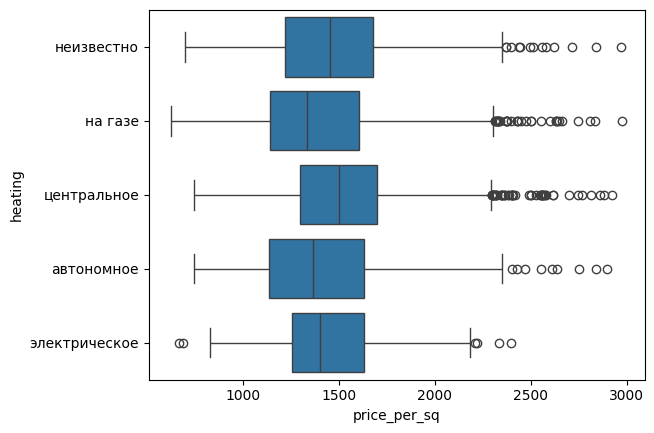

In [45]:
sns.boxplot(data=train, x='price_per_sq', y='heating')

## Состояние

In [46]:
train['condition'] = train['Состояние']
test['condition'] = test['Состояние']


train.condition.value_counts()

condition
евроремонт               2630
под самоотделку (псо)    2408
хорошее                  1026
среднее                   329
не достроено              124
Name: count, dtype: int64

In [47]:
test.condition.value_counts()

condition
евроремонт               674
под самоотделку (псо)    544
хорошее                  273
среднее                   89
не достроено              46
Name: count, dtype: int64

In [48]:
# не особо много нанов, давайте оставим как есть
train.condition = train.condition.fillna('неизвестно')
test.condition = test.condition.fillna('неизвестно')

## Мебель

<Axes: xlabel='price_per_sq', ylabel='Мебель'>

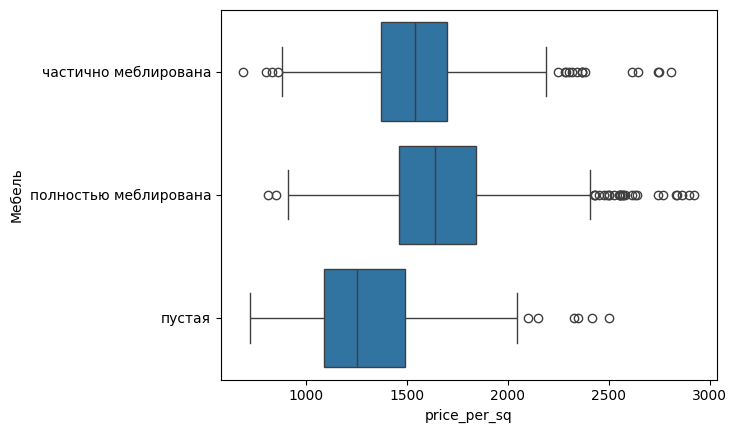

In [49]:
sns.boxplot(data=train, x='price_per_sq', y='Мебель')

In [50]:
# тут очень много нанов, но я бы предположил, что если в квартире есть мебель, то ее точно указывают, а если ее нет, то обычно пропускают данное поле
# можно попробовать дополнительно поискать в description, оказывается нет такого поля (

In [51]:
train_experiment = train.copy()
train_experiment.Мебель = train_experiment.Мебель.fillna('не указано')
train_experiment

main  \
0     3-комн. кв., 113.8 м2   
1        2-комн. кв., 66 м2   
2        3-комн. кв., 68 м2   
3       4-комн. кв., 135 м2   
4        2-комн. кв., 67 м2   
...                     ...   
7129     2-комн. кв., 48 м2   
7130     3-комн. кв., 89 м2   
7131  2-комн. кв., 80.21 м2   
7132  3-комн. кв., 145.3 м2   
7133    4-комн. кв., 138 м2   

                                                address  \
0      Бишкек, Московская - Уметалиева, Московская, 191   
1     Бишкек, с. Кок-Джар, с.Кок-Жар, ул.Конкур Осмо...   
2                   Бишкек, 12 м-н, 12-й микрорайон, 69   
3     Бишкек, Магистраль, Байтик Баатыра (недалеко о...   
4              Бишкек, Джал 15 м-н, Ахунбаева/Тыналиева   
...                                                 ...   
7129                                 Бишкек, Юг-2 м-н 6   
7130         Бишкек, Магистраль, Сухэ Батора/Токомбаева   
7131  Бишкек, Советская - Скрябина, Медерова 44/2 / ...   
7132           Бишкек, Дворец спорта, Абдымомунова, 244   
7133   Бишкек, Магистраль, Байтик-Баатыра/А. Токомбаева   

                          added                   upped  view_count  hearts  \
0      Добавлено 2 месяца назад  Поднято 12 часов назад         302     1.0   
1        Добавлено 7 дней назад   Поднято 7 часов назад         102     NaN   
2        Добавлено 5 дней назад   Поднято 9 часов назад         104     NaN   
3      Добавлено 4 месяца назад   Поднято 7 часов назад         797     3.0   
4      Добавлено 3 месяца назад   Поднято 20 дней назад         512     1.0   
...                         ...                     ...         ...     ...   
7129     Добавлено 8 дней назад    Поднято 8 дней назад         171     1.0   
7130     Добавлено 5 дней назад  Поднято 12 часов назад          85     1.0   
7131    Добавлено 1 месяц назад   Поднято 8 часов назад         365     1.0   
7132  Добавлено 8 месяцев назад  Поднято 14 часов назад        1099     NaN   
7133    Добавлено 15 дней назад  Поднято 16 часов назад         140     NaN   

          lat      lon Тип предложения                Серия  \
0     42.8711  74.5823       от агента  индивид. планировка   
1     42.8131  74.6482       от агента               элитка   
2     42.8129  74.6390       от агента            106 серия   
3     42.8171  74.6059       от агента               элитка   
4     42.8467  74.5656       от агента               элитка   
...       ...      ...             ...                  ...   
7129  42.8603  74.6078       от агента            105 серия   
7130  42.8213  74.6168       от агента               элитка   
7131  42.8511  74.6147       от агента               элитка   
7132  42.8800  74.5944       от агента  индивид. планировка   
7133  42.8192  74.6031       от агента               элитка   

                      Дом           Этаж                            Площадь  \
0      кирпичный, 2017 г.  10 этаж из 12           113.8 м2, жилая: 62.9 м2   
1     монолитный, 2023 г.  10 этаж из 12                              66 м2   
2      кирпичный, 1990 г.    7 этаж из 9                68 м2, жилая: 40 м2   
3     монолитный, 2022 г.   6 этаж из 14                             135 м2   
4     монолитный, 2023 г.   6 этаж из 14                              67 м2   
...                   ...            ...                                ...   
7129   панельный, 1979 г.    3 этаж из 9  48 м2, жилая: 30 м2, кухня: 10 м2   
7130   кирпичный, 2022 г.  11 этаж из 14                              89 м2   
7131  монолитный, 2025 г.  14 этаж из 17                           80.21 м2   
7132  монолитный, 2019 г.  12 этаж из 12           145.3 м2, жилая: 83.9 м2   
7133  монолитный, 2022 г.   8 этаж из 14                             138 м2   

        Отопление              Состояние            Газ        Санузел  \
0             NaN                    NaN            NaN            NaN   
1         на газе             евроремонт  магистральный    совмещенный   
2             NaN                    NaN            NaN         

<Axes: xlabel='price_per_sq', ylabel='Мебель'>

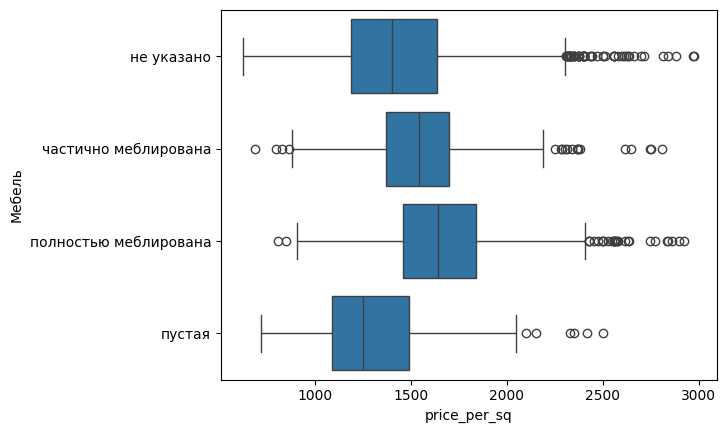

In [52]:
sns.boxplot(data=train_experiment, x='price_per_sq', y='Мебель')

In [53]:
train['furniture'] = train['Мебель']
test['furniture'] = test['Мебель']

train.furniture = train.furniture.fillna('не указано')
test.furniture = test.furniture.fillna('не указано')

## Серия

In [54]:
train['series'] = train['Серия']
test['series'] = test['Серия']

train.series.value_counts()

series
элитка                  4763
индивид. планировка      963
104 серия                352
105 серия                305
106 серия                248
106 серия улучшенная     130
хрущевка                 127
108 серия                 90
105 серия улучшенная      37
малосемейка               35
сталинка                  22
пентхаус                  19
104 серия улучшенная      18
107 серия                  9
Name: count, dtype: int64

<Axes: xlabel='price_per_sq', ylabel='series'>

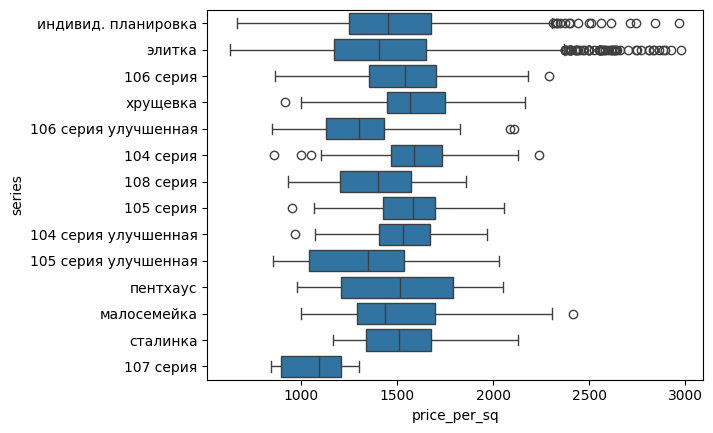

In [55]:
sns.boxplot(data=train, x='price_per_sq', y='series')

In [56]:
# давайте удостоверимся, что все что есть в тесте есть и в трейне

for value in test.series.unique():
  if value not in train.series.unique():
    print(value)

# пустой вывод - значит все гуд

In [57]:
train.series = train.series.fillna('элитка')

## Высота потолков

In [58]:
train['ceiling_height'] = train['Высота потолков']
test['ceiling_height'] = test['Высота потолков']

train.ceiling_height.value_counts()

ceiling_height
3 м.       2513
2.8 м.      337
3.2 м.      254
3.3 м.      252
3.1 м.      247
2.5 м.      216
2.7 м.       60
3.5 м.       42
2.6 м.       34
2 м.         28
2.9 м.       27
3.25 м.      22
280 м.       21
3.4 м.       19
2.75 м.      18
3.15 м.       8
3.05 м.       6
270 м.        5
3.6 м.        5
3.45 м.       5
4.2 м.        4
3.7 м.        4
2.85 м.       4
3.16 м.       3
330 м.        3
250 м.        3
4 м.          3
300 м.        3
2.95 м.       2
260 м.        2
265 м.        2
4.5 м.        2
2.3 м.        1
2.4 м.        1
25 м.         1
230 м.        1
28 м.         1
3100 м.       1
295 м.        1
310 м.        1
32 м.         1
315 м.        1
290 м.        1
285 м.        1
47 м.         1
2.78 м.       1
340 м.        1
3.75 м.       1
2.76 м.       1
3.35 м.       1
2.55 м.       1
3.8 м.        1
23 м.         1
4.15 м.       1
2700 м.       1
2.83 м.       1
4.3 м.        1
Name: count, dtype: int64

<Axes: xlabel='ceiling_height', ylabel='Density'>

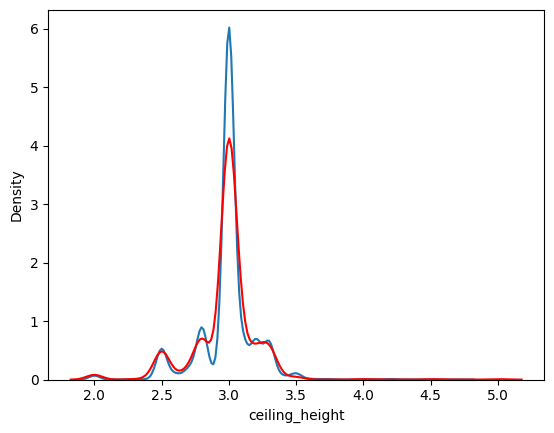

In [59]:
def get_ceiling_height(x):
  x = str(x)
  if x == 'nan':
    return None
  x = x.split()[0]
  x = float(x)
  while x > 10:
    x /= 10
  return x

train.ceiling_height = train.ceiling_height.map(get_ceiling_height)
test.ceiling_height = test.ceiling_height.map(get_ceiling_height)

sns.kdeplot(train.ceiling_height)
sns.kdeplot(test.ceiling_height, color='red')

## Median_price, median_price_std

In [60]:
def get_median_price(row):
  global train
  zone = row['zone']
  return train.loc[train.zone == zone].price_per_sq.median()


def get_median_price_std(row):
  global train
  zone = row['zone']
  return train.loc[train.zone == zone].price_per_sq.std()


def get_zone_count(row):
  global train
  zone = row['zone']
  return len(train.loc[train.zone == zone])


train['median_price'] = train.apply(get_median_price, axis=1)
test['median_price'] = test.apply(get_median_price, axis=1)

train['median_price_std'] = train.apply(get_median_price_std, axis=1)
test['median_price_std'] = test.apply(get_median_price_std, axis=1)

train['zone_count'] = train.apply(get_zone_count, axis=1)
test['zone_count'] = test.apply(get_zone_count, axis=1)

train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7119 entries, 0 to 7133
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   main                            7119 non-null   object 
 1   address                         7119 non-null   object 
 2   added                           7119 non-null   object 
 3   upped                           6688 non-null   object 
 4   view_count                      7119 non-null   int64  
 5   hearts                          4512 non-null   float64
 6   lat                             7119 non-null   float64
 7   lon                             7119 non-null   float64
 8   Тип предложения                 7119 non-null   object 
 9   Серия                           7118 non-null   object 
 10  Дом                             7119 non-null   object 
 11  Этаж                            7115 non-null   object 
 12  Площадь                         7119 no

(None, None)

# Отбор признаков

In [61]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7119 entries, 0 to 7133
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   main                            7119 non-null   object 
 1   address                         7119 non-null   object 
 2   added                           7119 non-null   object 
 3   upped                           6688 non-null   object 
 4   view_count                      7119 non-null   int64  
 5   hearts                          4512 non-null   float64
 6   lat                             7119 non-null   float64
 7   lon                             7119 non-null   float64
 8   Тип предложения                 7119 non-null   object 
 9   Серия                           7118 non-null   object 
 10  Дом                             7119 non-null   object 
 11  Этаж                            7115 non-null   object 
 12  Площадь                         7119 no

(None, None)

In [62]:
need_columns = ['rooms_num',
                'square',
                'is_city',
                'offer_type',
                'zone',
                'flat_floor',
                'floors_num',
                'wall_material',
                'build_age',
                'heating',
                'condition',
                'series',
                'ceiling_height',
                'furniture',
                'median_price',
                'median_price_std',
                'zone_count']
train = train[need_columns+['price_per_sq']]
test = test[['id'] + need_columns]
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7119 entries, 0 to 7133
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rooms_num         7119 non-null   int64  
 1   square            7119 non-null   float64
 2   is_city           7119 non-null   int64  
 3   offer_type        7119 non-null   object 
 4   zone              7119 non-null   object 
 5   flat_floor        7115 non-null   float64
 6   floors_num        7115 non-null   float64
 7   wall_material     7119 non-null   object 
 8   build_age         7119 non-null   float64
 9   heating           7119 non-null   object 
 10  condition         7119 non-null   object 
 11  series            7119 non-null   object 
 12  ceiling_height    4179 non-null   float64
 13  furniture         7119 non-null   object 
 14  median_price      7119 non-null   float64
 15  median_price_std  7115 non-null   float64
 16  zone_count        7119 non-null   int64  
 17  

(None, None)

# Строим модель

## Подбор гиперпараметров

In [63]:
!pip install optuna catboost

In [64]:
# import optuna
# from catboost import CatBoostRegressor, Pool
# from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
# from sklearn.model_selection import KFold
# import numpy as np

# # Assuming train is your DataFrame
# X, y = train.drop('price_per_sq', axis=1), train['price_per_sq']

# categorical_features = ['offer_type', 'zone', 'wall_material', 'heating', 'condition', 'series', 'is_city', 'furniture']

# def objective(trial):
#     # Define hyperparameters for optimization
#     params = {
#         'iterations': trial.suggest_int('iterations', 200, 1500),
#         'depth': trial.suggest_int('depth', 4, 10),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
#         'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10.0, log=True),
#         'border_count': trial.suggest_int('border_count', 32, 255),
#         'random_strength': trial.suggest_float('random_strength', 1e-8, 10.0, log=True),
#         'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
#         'loss_function': trial.suggest_categorical('loss_function', ['RMSE', 'MAE', 'MAPE', 'Poisson']),
#         'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 100),
#         'task_type': 'GPU',  # Использование GPU
#         'devices': '0',      # Указание устройства GPU
#         'verbose': 0
#     }

#     # Initialize KFold
#     kf = KFold(n_splits=5, shuffle=True, random_state=42)
#     mape_scores = []

#     # Perform 5-fold cross-validation
#     for train_idx, val_idx in kf.split(X):
#         X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
#         y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

#         # Create CatBoost pools
#         train_pool = Pool(X_train, y_train, cat_features=categorical_features)
#         val_pool = Pool(X_val, y_val, cat_features=categorical_features)

#         # Create and train model
#         model = CatBoostRegressor(**params)
#         model.fit(
#             train_pool,
#             eval_set=val_pool,
#             early_stopping_rounds=50,
#             verbose=False
#         )

#         # Predict and compute MSE
#         y_pred = model.predict(X_val)
#         mape = mean_absolute_percentage_error(y_val, y_pred)
#         mape_scores.append(mape)

#     # Return average MSE across folds
#     return np.mean(mape_scores)

# # Create and run optimization
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=30)

# # Print best parameters and MSE
# print("Best parameters:", study.best_params)
# print("Best MSE:", study.best_value)

In [65]:
!nvidia-smi

Sat Jul 26 14:50:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   53C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import optuna
from optuna.samplers import TPESampler
from optuna.pruners import HyperbandPruner
import optuna.visualization as vis
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, make_scorer
from catboost import CatBoostRegressor

# Assuming train is your DataFrame
X, y = train.drop('price_per_sq', axis=1), train['price_per_sq']

categorical_features = ['offer_type', 'zone', 'wall_material', 'heating', 'condition', 'series', 'is_city', 'furniture']

def objective(trial):

    params = {
        'iterations': trial.suggest_int('iterations', 200, 1500),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10.0, log=True),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'random_strength': trial.suggest_float('random_strength', 1e-8, 10.0, log=True),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'loss_function': trial.suggest_categorical('loss_function', ['RMSE', 'MAE', 'MAPE', 'Poisson']),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 100),
        'task_type': 'GPU',  # Использование GPU
        'devices': '0',      # Указание устройства GPU
        'verbose': 0,
        'cat_features': categorical_features,
    }

    n_splits = 4
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    mape_scores = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
        X_fold_train, X_fold_val = X.iloc[train_idx], X.iloc[val_idx]
        y_fold_train, y_fold_val = y.iloc[train_idx], y.iloc[val_idx]

        model = CatBoostRegressor(
            **params,
        )

        model.fit(X_fold_train, np.log1p(y_fold_train))

        # Прогнозирование и оценка
        y_pred = np.expm1(model.predict(X_fold_val))
        mape = mean_absolute_percentage_error(y_fold_val, y_pred)
        mape_scores.append(mape)

        # Отчет о прогрессе для прунинга
        trial.report(mape, step=fold)
        if trial.should_prune():
            raise optuna.TrialPruned()

    # Возвращаем среднее значение MAPE по всем фолдам
    return np.mean(mape_scores)

# 3. Настройка прунера Hyperband и сэмплера TPE
pruner = HyperbandPruner(
    min_resource=1,      # Минимальное количество ресурсов (фолдов) для начала оценки
    max_resource=4,      # Максимальное количество ресурсов (фолдов)
    reduction_factor=2   # Фактор уменьшения (количество испытаний, которые будут отсеяны)
)

sampler = TPESampler(seed=42)

# 4. Создание и запуск исследования Optuna
study = optuna.create_study(
    direction="minimize",
    sampler=sampler,
    pruner=pruner,
    study_name="CatBoostRegressor Hyperparameter Optimization"
)

study.optimize(objective, n_trials=30, timeout=None, n_jobs=1)

[I 2025-07-26 14:52:27,024] A new study created in memory with name: CatBoostRegressor Hyperparameter Optimization
[I 2025-07-26 14:55:38,672] Trial 0 finished with value: 0.10442184066013975 and parameters: {'iterations': 687, 'depth': 10, 'learning_rate': 0.1205712628744377, 'l2_leaf_reg': 0.24810409748678125, 'border_count': 66, 'random_strength': 2.5348407664333426e-07, 'bagging_temperature': 0.05808361216819946, 'loss_function': 'RMSE', 'min_data_in_leaf': 97}. Best is trial 0 with value: 0.10442184066013975.
Default metric period is 5 because MAE is/are not implemented for GPU
Default metric period is 5 because MAE is/are not implemented for GPU


## Построение финальной модели

In [64]:
best_params = {
    'iterations': 487,
    'depth': 5,
    'learning_rate': 0.0818322,
    'l2_leaf_reg': 0.0017825,
    'border_count': 89,
    'random_strength': 0.14774,
    'bagging_temperature': 0.633,
    'loss_function':'Poisson',
    'min_data_in_leaf': 58,
}

In [65]:
import optuna
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import KFold
import numpy as np

X, y = train.drop('price_per_sq', axis=1), train['price_per_sq']

categorical_features = ['offer_type', 'zone', 'wall_material', 'heating', 'condition', 'series', 'is_city', 'furniture']


final_model = CatBoostRegressor(**best_params)
final_model.fit(X, y, cat_features=categorical_features)  # Train on full dataset

# Save model
final_model.save_model('catboost_model.cbm')

0:	learn: -681.6216652	total: 70.6ms	remaining: 34.3s
1:	learn: -1496.0117390	total: 127ms	remaining: 30.7s
2:	learn: -2253.2001218	total: 161ms	remaining: 26s
3:	learn: -2937.0900606	total: 185ms	remaining: 22.3s
4:	learn: -3562.3947758	total: 213ms	remaining: 20.5s
5:	learn: -4134.7404235	total: 239ms	remaining: 19.2s
6:	learn: -4657.6983631	total: 265ms	remaining: 18.2s
7:	learn: -5135.0301253	total: 296ms	remaining: 17.7s
8:	learn: -5569.8741526	total: 318ms	remaining: 16.9s
9:	learn: -5965.3050865	total: 339ms	remaining: 16.2s
10:	learn: -6324.1660646	total: 373ms	remaining: 16.1s
11:	learn: -6648.9611122	total: 394ms	remaining: 15.6s
12:	learn: -6942.0417195	total: 422ms	remaining: 15.4s
13:	learn: -7205.8989946	total: 444ms	remaining: 15s
14:	learn: -7442.7882290	total: 467ms	remaining: 14.7s
15:	learn: -7654.7287994	total: 495ms	remaining: 14.6s
16:	learn: -7843.8689566	total: 522ms	remaining: 14.4s
17:	learn: -8012.1208501	total: 546ms	remaining: 14.2s
18:	learn: -8161.3495847

## Анализ ошибок

In [76]:
# ** - раскрытие словаря в функциях и методах
def test(a=1, b=2):
  return a * b

test_dict = {
    'a': 4,
    'b': 5,
}

test(**test_dict)

20

In [97]:
import optuna
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import KFold
import numpy as np

X, y = train.drop('price_per_sq', axis=1), train['price_per_sq']

categorical_features = ['offer_type', 'zone', 'wall_material', 'heating', 'condition', 'series', 'is_city', 'furniture']

best_params = {
    'iterations': 487,
    'depth': 5,
    'learning_rate': 0.0818322,
    'l2_leaf_reg': 0.0017825,
    'border_count': 89,
    'random_strength': 0.14774,
    'bagging_temperature': 0.633,
    'loss_function':'Poisson',
    'min_data_in_leaf': 58,
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
gen_ape = pd.Series()
y_true_series = pd.Series()
y_pred_series = pd.Series()

for train_idx, val_idx in kf.split(X):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Create CatBoost pools
    train_pool = Pool(X_train, y_train, cat_features=categorical_features)
    val_pool = Pool(X_val, y_val, cat_features=categorical_features)

    # Create and train model
    model = CatBoostRegressor(**best_params)
    model.fit(
        train_pool,
        eval_set=val_pool,
        early_stopping_rounds=50,
        verbose=False
    )

    # Predict and compute MSE
    y_pred = model.predict(X_val)
    ape = np.abs(y_val-y_pred) / y_val
    gen_ape = pd.concat([gen_ape, ape])
    y_true_series = pd.concat([y_true_series, y_val])
    y_pred_series = pd.concat([y_pred_series, pd.Series(y_pred, index=y_val.index)])
    print(y_pred_series)
    print(gen_ape)

/tmp/ipython-input-97-3935839347.py:48: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  gen_ape = pd.concat([gen_ape, ape])
/tmp/ipython-input-97-3935839347.py:49: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  y_true_series = pd.concat([y_true_series, y_val])
/tmp/ipython-input-97-3935839347.py:50: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation

8       1160.033697
14      1445.087283
17      1708.402908
19       982.850456
23      1244.573439
           ...     
7101    1730.576733
7112    1846.563610
7116    1544.031036
7123    1649.492535
7125    1335.611673
Length: 1424, dtype: float64
8       0.039972
14      0.069365
17      0.116382
19      0.009414
23      0.131430
          ...   
7101    0.021706
7112    0.102212
7116    0.004370
7123    0.151690
7125    0.139776
Length: 1424, dtype: float64
8       1160.033697
14      1445.087283
17      1708.402908
19       982.850456
23      1244.573439
           ...     
7096    1700.436635
7113    1118.747846
7114    1422.725740
7128    1375.244351
7132    1556.602677
Length: 2848, dtype: float64
8       0.039972
14      0.069365
17      0.116382
19      0.009414
23      0.131430
          ...   
7096    0.010074
7113    0.125978
7114    0.223850
7128    0.026750
7132    0.130099
Length: 2848, dtype: float64
8       1160.033697
14      1445.087283
17      1708.402908
19       9

In [98]:
X['ape'] = gen_ape
X['y_true'] = y_true_series
X['y_pred'] = y_pred_series
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7119 entries, 0 to 7133
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rooms_num       7119 non-null   int64  
 1   square          7119 non-null   float64
 2   is_city         7119 non-null   int64  
 3   offer_type      7119 non-null   object 
 4   zone            7119 non-null   object 
 5   flat_floor      7115 non-null   float64
 6   floors_num      7115 non-null   float64
 7   wall_material   7119 non-null   object 
 8   build_age       7119 non-null   float64
 9   heating         7119 non-null   object 
 10  condition       7119 non-null   object 
 11  series          7119 non-null   object 
 12  ceiling_height  4179 non-null   float64
 13  furniture       7119 non-null   object 
 14  ape             7119 non-null   float64
 15  y_true          7119 non-null   float64
 16  y_pred          7119 non-null   float64
dtypes: float64(8), int64(2), object(7)
mem

In [99]:
X.head(10)

rooms_num  square  is_city       offer_type             zone  flat_floor  \
0          3   113.8        1        от агента  87201aa48ffffff        10.0   
1          2    66.0        0        от агента  87201bda0ffffff        10.0   
2          3    68.0        1        от агента  87201bda0ffffff         7.0   
3          4   135.0        1        от агента  87201bda4ffffff         6.0   
4          2    67.0        1        от агента  87201aa4effffff         6.0   
5          1    34.0        1        от агента  87201aa48ffffff         3.0   
6          3    85.0        1  от собственника  87201bd16ffffff         9.0   
7          2    70.0        1        от агента  87201aa48ffffff        10.0   
8          2    48.0        1        от агента  87201bd10ffffff         2.0   
9          2    67.0        1        от агента  87201bd13ffffff         4.0   

   floors_num wall_material  build_age      heating              condition  \
0        12.0     кирпичный     2017.0   неизвестно             неизвестно   
1        12.0    монолитный     2023.0      на газе             евроремонт   
2         9.0     кирпичный     1990.0   неизвестно             неизвестно   
3        14.0    монолитный     2022.0      на газе             евроремонт   
4        14.0    монолитный     2023.0      на газе             евроремонт   
5         3.0     кирпичный     1970.0  центральное  под самоотделку (псо)   
6        13.0    монолитный     2021.0  центральное             евроремонт   
7        12.0    монолитный     2019.0  центральное             евроремонт   
8        13.0    монолитный     2023.0  центральное  под самоотделку (псо)   
9         9.0     панельный     1990.0      на газе  под самоотделку (псо)   

                 series  ceiling_height              furniture       ape  \
0   индивид. планировка             3.0             не указано  0.121566   
1                элитка             3.0   частично меблирована  0.062649   
2             106 серия             2.8             не указано  0.057714   
3                элитка             3.0  полностью меблирована  0.094899   
4                элитка             3.0  полностью меблирована  0.044213   
5              хрущевка             3.5                 пустая  0.107637   
6                элитка             3.0  полностью меблирована  0.006885   
7                элитка             3.0  полностью меблирована  0.047423   
8                элитка             3.0             не указано  0.039972   
9  106 серия улучшенная             NaN             не указано  0.120970   

        y_true       y_pred  
0  1379.613357  1547.326750  
1  1462.121212  1370.521410  
2  1595.588235  1503.499811  
3  1925.925926  2108.693991  
4  1537.313433  1605.282887  
5  1588.235294  1417.281903  
6  1529.411765  1539.941670  
7  1642.857143  1720.766056  
8  1208.333333  1160.033697  
9   850.746269   953.661266

<Axes: xlabel='ape', ylabel='Density'>

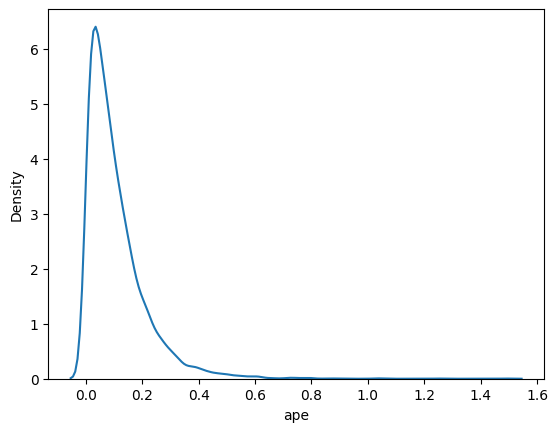

In [100]:
sns.kdeplot(X.ape)

In [102]:
X.loc[X.ape > 0.8]

rooms_num  square  is_city       offer_type             zone  \
3473          1    26.7        1        от агента  87201aa48ffffff   
3760          5   216.0        1        от агента  87201aa4dffffff   
4164          3    58.0        1        от агента  87201bd36ffffff   
4264          2    74.0        1  от собственника  87201bda4ffffff   
6859          3   102.0        1        от агента  87201bda4ffffff   
6989          1    34.7        1        от агента  87201aa6affffff   

      flat_floor  floors_num wall_material  build_age        heating  \
3473         2.0         4.0     кирпичный     1958.0     неизвестно   
3760         7.0         8.0     кирпичный     2012.0    центральное   
4164         1.0         1.0     кирпичный     2005.0  электрическое   
4264         6.0        10.0    монолитный     2010.0        на газе   
6859        13.0        14.0    монолитный     2023.0     автономное   
6989         2.0         5.0     кирпичный     2024.0     неизвестно   

                  condition               series  ceiling_height  \
3473             неизвестно  индивид. планировка             2.5   
3760             евроремонт               элитка             3.0   
4164                хорошее  индивид. планировка             3.0   
4264  под самоотделку (псо)               элитка             3.3   
6859             евроремонт               элитка             NaN   
6989             неизвестно  индивид. планировка             3.0   

                  furniture       ape      y_true       y_pred  
3473             не указано  0.856043  955.056180  1772.625447  
3760  полностью меблирована  1.035378  810.185185  1649.033358  
4164   частично меблирована  1.251841  689.655172  1552.993907  
4264             не указано  1.491785  628.000000  1564.841122  
6859             не указано  1.037486  750.000000  1528.114802  
6989             не указано  0.884056  778.097983  1465.980190

In [66]:
import shap

shap.initjs()

## Предсказываем тест

<Axes: xlabel='square', ylabel='Density'>

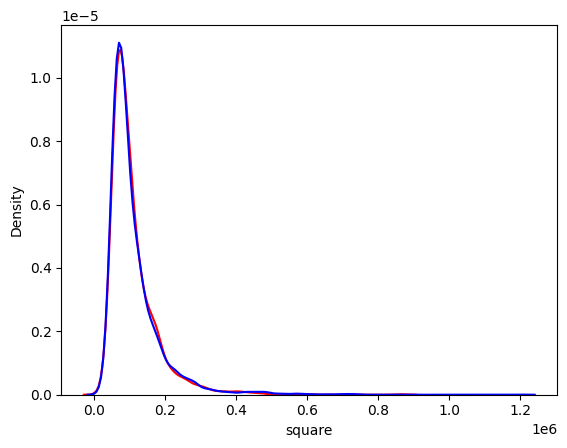

In [ ]:
test_id, test_X = test.id, test.drop('id', axis=1)
y_test = final_model.predict(test_X) * test_X.square
sns.kdeplot(y_test, color='red')
sns.kdeplot(train.price_per_sq*train.square, color='blue')

In [ ]:
submission_df = pd.DataFrame({'id': test_id, 'usd_price': y_test})
submission_df.to_csv('submission.csv', index=False)